<a href="https://colab.research.google.com/github/Reethz30/Email_Spam_Detection-using-ML/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Email Spam Detection using Machine Learning
In this Python project, I've developed a spam email detection system. The aim is to build a machine-learning model that can accurately classify emails as either spam or authentic (ham), allowing us to filter out unwanted and potentially harmful emails from our inboxes. To achieve this, I've employed both TF-IDF and BoW techniques for feature extraction.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
from nltk.corpus import stopwords
from collections import Counter

**Loading the Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
dataset=pd.read_csv('/content/drive/MyDrive/Email_spam_detection/spam.csv',encoding="ISO-8859-1")

**Exploring the Dataset**

In [4]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
dataset=dataset.drop(df, axis=1)

In [6]:
dataset

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
dataset.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
dataset[dataset.duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [10]:
dataset=dataset.drop_duplicates()
dataset

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
dataset.shape

(5169, 2)

In [12]:
dataset["v1"].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

In [13]:
dataset["v2"].value_counts()

v2
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                               1
Wake me up at  &lt;#&gt;  am morning:)                                                                                                                        1
I will reach ur home in  &lt;#&gt;  minutes                                                                                                                   1
Wait.i will come out.. &lt;#&gt;  min:)                                                                                                                       1
R u here yet? I'm wearing blue shirt n black pants.                                                                                                           1
                                                                                                                                                             ..
;-( oh well, c u later               

In [41]:
data=dataset
#data

,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0.0
5568,ham,Will Ì_ b going to esplanade fr home?,1.0
5569,ham,"Pity, * was in mood for that. So...any other s...",1.0
5570,ham,The guy did some bitching but I acted like i'd...,1.0


**Data Visualisation**

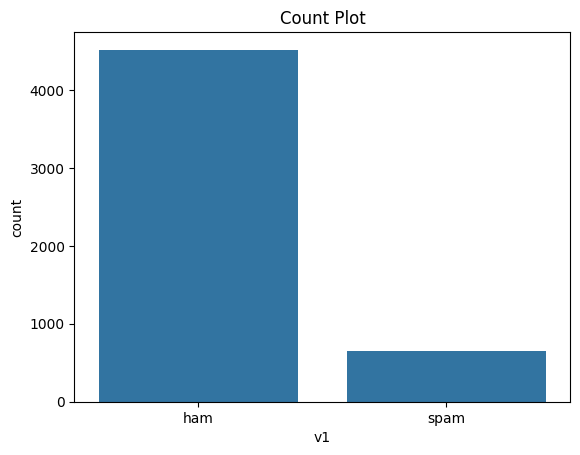

In [14]:
#Count plot
sn.countplot(data=dataset, x='v1')
plt.xlabel('v1')
plt.ylabel('count')
plt.title('Count Plot')
plt.show()

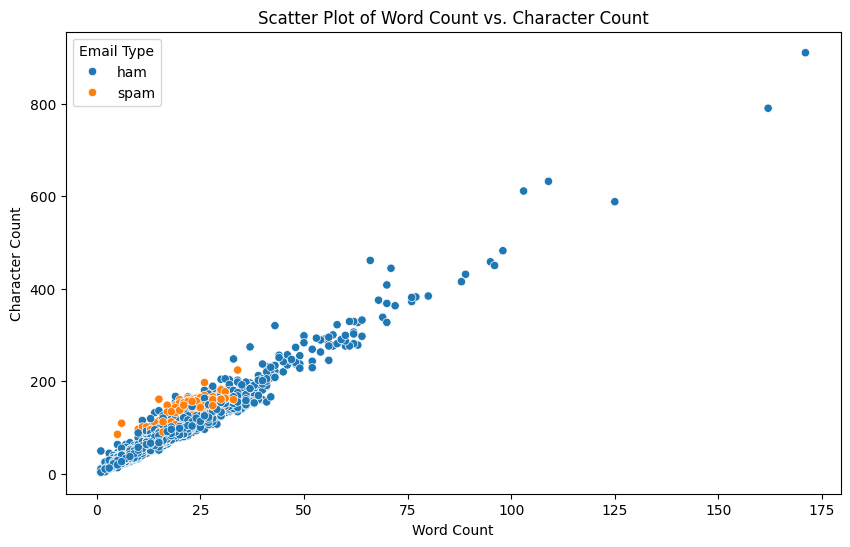

In [21]:
#using scatterplot of word count vs. character count
d1=dataset
d1['word_count']=d1['v2'].apply(lambda x: len(x.split()))
d1['char_count']=d1['v2'].apply(lambda x: len(x))
plt.figure(figsize=(10, 6))
sn.scatterplot(x='word_count',y='char_count',hue='v1',data=d1)
plt.title('Scatter Plot of Word Count vs. Character Count')
plt.xlabel('Word Count')
plt.ylabel('Character Count')
plt.legend(title='Email Type')
plt.show()

**Preprocessing the data**

In [22]:
dataset.loc[dataset["v1"] == "spam", "Category"] = 0
dataset.loc[dataset["v1"] == "ham", "Category"] = 1

<ipython-input-22-c75c9216001e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[dataset["v1"] == "spam", "Category"] = 0


In [23]:
dataset.head()

,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0


In [24]:
x=dataset['v2']
y=dataset['Category']

In [25]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

In [26]:
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5567    0.0
5568    1.0
5569    1.0
5570    1.0
5571    1.0
Name: Category, Length: 5169, dtype: float64

**Splittig the data into Train and Test data**

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

**Feature Extraction - TF-IDF**

In [28]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_features=feature_extraction.fit_transform(x_train)
X_test_features=feature_extraction.transform(x_test)
y_train=y_train.astype(int)
y_test=y_test.astype(int)
#print(X_train_features,X_test_features,y_train,y_test)

**Model Training**

In [29]:
model=LogisticRegression()
model.fit(X_train_features,y_train)

LogisticRegression()

**Model Evaluation**

In [30]:
predict=model.predict(X_train_features)
accuracy=accuracy_score(y_train,predict)

In [31]:
predict1=model.predict(X_test_features)
accuracy1=accuracy_score(y_test,predict1)

In [32]:
print('Accuracy Score on Training Data:{}%'.format(accuracy*100))

Accuracy Score on Training Data:95.88170259812051%


In [33]:
print('Accuracy Score on Testing Data:{}%'.format(accuracy1*100))

Accuracy Score on Testing Data:94.84203739522889%


**Confusion Matrix Visualization**

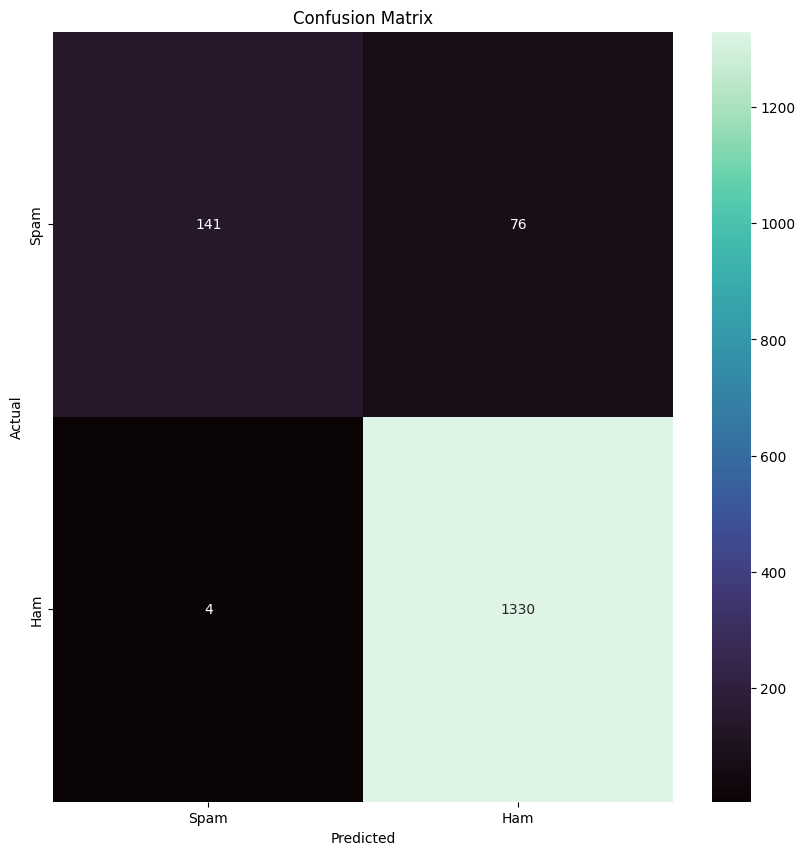

In [34]:
confusion_mat=confusion_matrix(y_test,predict1)
plt.figure(figsize=(10,10))
sn.heatmap(confusion_mat,annot=True,fmt="d",cmap="mako",xticklabels=['Spam','Ham'],yticklabels=['Spam','Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Calculating and Displaying Error Metrics**

In [35]:
classification_r=classification_report(y_test,predict1,target_names=['Spam','Ham'])
print('Classification Report:\n',classification_r)

Classification Report:
               precision    recall  f1-score   support

        Spam       0.97      0.65      0.78       217
         Ham       0.95      1.00      0.97      1334

    accuracy                           0.95      1551
   macro avg       0.96      0.82      0.87      1551
weighted avg       0.95      0.95      0.94      1551



In [36]:
TP=confusion_mat[1,1]
TN=confusion_mat[0,0]
FP=confusion_mat[0,1]
FN=confusion_mat[1,0]

acc=(TP+TN)/(TP+TN+FP+FN)
pre=TP/(TP+FP)
rec=TP/(TP+FN)
spec=TN/(TN+FP)

print("Accuracy : ",acc)
print("Precision : ",pre)
print("Recall : ",rec)
print("Specificity : ",spec)

Accuracy :  0.9484203739522888
Precision :  0.9459459459459459
Recall :  0.9970014992503748
Specificity :  0.6497695852534562


**Make Predictions on New Input**

In [37]:
ip1="Dear John, I hope this email finds you well. Attached is the report you requested for our upcoming meeting. Please review it at your convenience"
ip_features1=feature_extraction.transform([ip1])
pred=model.predict(ip_features1)
if pred[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


In [38]:
ip2="Congratulations! You've won a luxury vacation package worth $10,000! Click here to claim your prize now!"
ip_features2=feature_extraction.transform([ip2])
pred=model.predict(ip_features2)
if pred[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


In [39]:
ip3="FREE entry into our 螢250 weekly competition just text the word WIN to 80086 NOW. 18 T&C www.txttowin.co.uk"
ip_features3=feature_extraction.transform([ip3])
pred=model.predict(ip_features3)
if pred[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


**Using Bag Of Words(Bow)**


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB as mnb
x_train,x_test,y_train,y_test=train_test_split(data['v2'],data['v1'],test_size=0.4)

In [50]:
# Create a CountVectorizer instance
vectorizer=CountVectorizer()

# Fit and transform the training data to BoW representation
X_train_bow=vectorizer.fit_transform(x_train)

# Transform the test data to BoW representation
X_test_bow=vectorizer.transform(x_test)

# Train a classifier (e.g., Naive Bayes) using the BoW features
classifier=mnb()
classifier.fit(X_train_bow,y_train)

# Make predictions on the test data
y_pred=classifier.predict(X_test_bow)

Accuracy: 0.9864603481624759

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1824
        spam       0.97      0.91      0.94       244

    accuracy                           0.99      2068
   macro avg       0.98      0.96      0.97      2068
weighted avg       0.99      0.99      0.99      2068



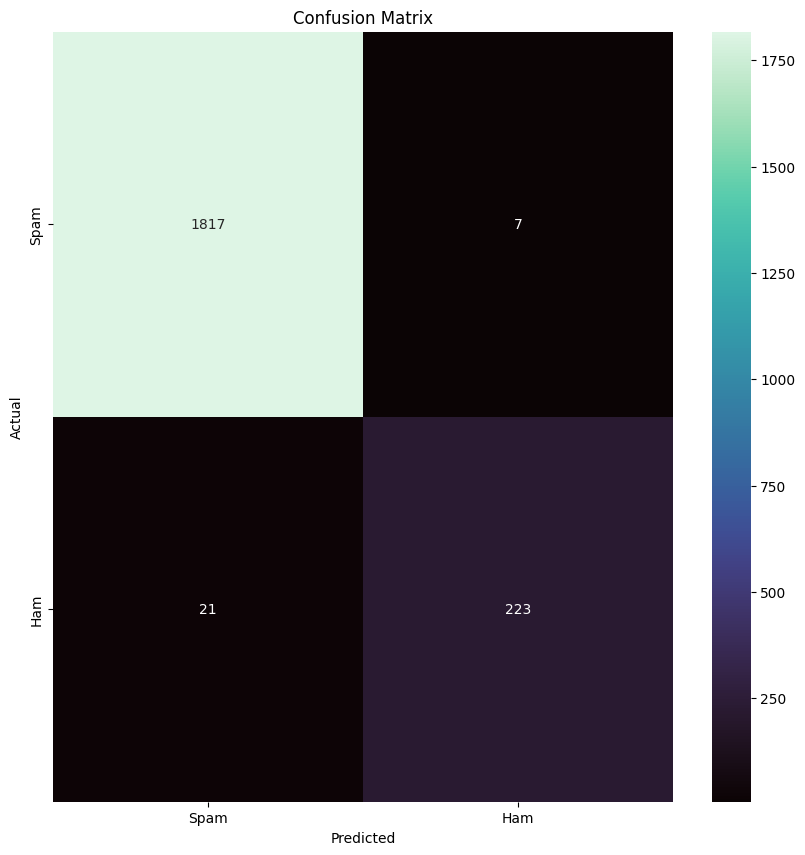

In [53]:
# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
confusion_mat=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sn.heatmap(confusion_mat,annot=True,fmt="d",cmap="mako",xticklabels=['Spam','Ham'],yticklabels=['Spam','Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [57]:
ip1="FREE entry into our 螢250 weekly competition just text the word WIN to 80086 NOW. 18 T&C www.txttowin.co.uk"
ip_features1=vectorizer.transform([ip1])
pred=classifier.predict(ip_features1)
if pred[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


In [59]:
ip2="UpgrdCentre Orange customer, you may now claim your FREE CAMERA PHONE upgrade for your loyalty. Call now on 0207 153 9153. Offer ends 26th July. T&C's apply. Opt-out available"
ip_features2=vectorizer.transform([ip2])
pred=classifier.predict(ip_features2)
if pred[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


In [62]:
ip3="Nope.Think i will go for it on monday.Sorry i replied so late."
ip_features3=vectorizer.transform([ip3])
pred=classifier.predict(ip_features3)
if pred[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


Bag of Words (BoW) and Term Frequency-Inverse Document Frequency (TF-IDF) are two key strategies for transforming text input into numerical representations for machine learning applications. BoW portrays documents as frequency vectors of individual words, whereas TF-IDF weights words according to their value in differentiating between texts. Both strategies are useful for email spam detection, where the aim is to separate unwanted emails from valid ones. BoW can detect certain patterns in spam, whereas TF-IDF focuses on terms that are more symptomatic of spam content. Machine learning models may efficiently identify and categorize spam emails using these approaches, as well as further techniques such as feature engineering and model optimization, resulting in a cleaner and more efficient email experience for users.
